# <h1><center>Demo 4</center></h1>

## CRS & Projections

In [1]:
# Import Geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
# Read Countries data
shp = 'data/countries.shp'
countries = gpd.read_file(shp)
countries.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [3]:
# Find the CRS of the countries data?
countries.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
# Read Conflict data
conflict_subset = gpd.read_file('data/ConflictData.shp')

We will project our data into mercator. The Mercator projection(3395), latitude-longitude quadrangles are stretched along the x-axis and y-axis as you move away from the equator.

In [6]:
# Look at the geometry column: decimal degrees
countries['geometry'][:5]

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

In [5]:
countries = countries[(countries.NAME != "Antarctica") & (countries.NAME != "Fr. S. Antarctic Lands")]
# Project the data into Mercator Projection epsg=3395

countries_projected = countries.to_crs(epsg=3395)

# See the geometry column of the projected countries
countries_projected['geometry'][:5]

0    MULTIPOLYGON (((13102705.696 460777.652, 13102...
1    MULTIPOLYGON (((13102705.696 460777.652, 13101...
2    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
3    POLYGON ((-7737827.685 -1967028.785, -7737828....
4    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
Name: geometry, dtype: geometry

<Axes: >

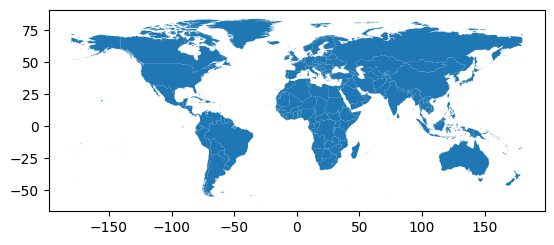

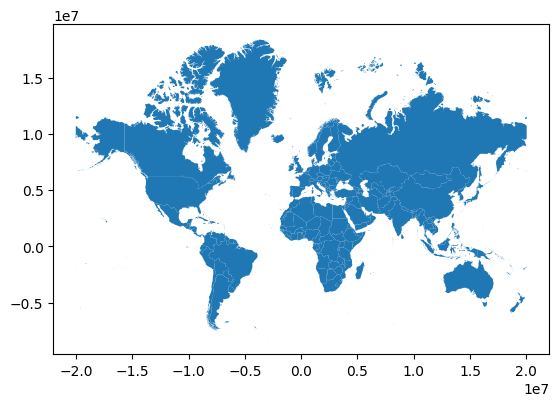

In [7]:
# Let us plot both unprojected and projected countries
countries.plot()
countries_projected.plot()

In [9]:
print(countries.crs)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [10]:
countries_projected.crs

<Derived Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## End of demo